# Machine Learning - Supervised Learning Algorithms

## Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

Supervised learning involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities. We will see examples of both types of supervised learning.

Unsupervised learning involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.

In addition, there are so-called semi-supervised learning methods, which falls somewhere between supervised learning and unsupervised learning. Semi-supervised learning methods are often useful when only incomplete labels are available.

In short,

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data

## Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.


### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

# **Supervised Learning Algorithms**

## **Linear Regression**

**a. Introducing Linear Regression:**

Linear regression is a popular and simple supervised learning algorithm used for regression tasks. It aims to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the data. It assumes that the relationship between the variables can be approximated as a straight line, making it suitable for tasks where the target variable is continuous.

**b. Concepts of Coefficients, Intercept, and the Least Squares Method:**

In linear regression, the goal is to find the best-fitting line that minimizes the difference between the actual target values and the predicted values. The line is represented by the equation:

    y = mx + b

where:
- y is the predicted value (dependent variable).
- m is the coefficient (slope), representing the change in y for a unit change in x.
- x is the independent variable (feature).
- b is the intercept, representing the value of y when x is 0.

The least squares method is used to find the best-fitting line by minimizing the sum of the squared differences between the actual target values and the predicted values. It calculates the coefficients and intercept that minimize the sum of squared residuals (the vertical distance between the data points and the line).

**c. Implementation using scikit-learn:**

Scikit-learn is a popular machine learning library in Python, and it provides an easy-to-use implementation of linear regression.

```python
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (features)
y = np.array([2, 4, 5, 4, 5])  # Dependent variable (target)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
```

In this example, we create a simple linear regression model using scikit-learn, fit it with sample data, and obtain the coefficients and intercept of the best-fitting line. The coefficients represent the slope of the line, and the intercept represents the y-intercept when x is 0. With this model, we can make predictions on new data using the equation y = mx + b. Linear regression is a powerful and interpretable algorithm, making it a popular choice for regression tasks where the relationship between variables is expected to be linear.

### Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to  (𝑥,𝑦)  data. We will use the following simple data for our regression example:

[3.43016491 2.26765146 4.15152096 6.39961079 6.46626912 9.96340913
 7.72844138 8.20024447 6.94170257 9.97179505 3.78546971 8.76229699
 1.91388605 3.01626765 9.76578491 6.29579027 9.96198096 1.19651728
 3.77019344 1.70263892 3.32066783 9.53522042 2.35588419 9.84573133
 0.37838207 9.79509611 6.92207416 3.48497606 7.84693135 9.45863731
 9.3587799  4.86504986 4.85537858 0.55508321 2.14534617 8.44133298
 4.33724073 1.11143168 7.65573007 8.59219398 2.23071305 9.964622
 5.47594632 8.48383498 4.17245476 8.44305846 8.38515292 2.87911962
 1.21068357 1.0270033 ]


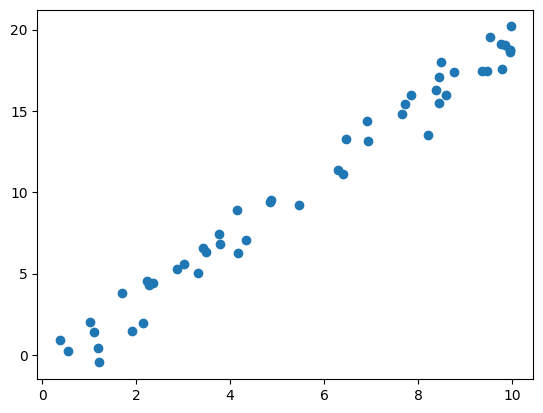

In [20]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState()

x = 10 * rng.rand(50)
print(x)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process:

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [21]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [22]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

#### 3. Arrange data into a features matrix and target vector

The Scikit-Learn data representation requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [23]:
X = x[:, np.newaxis]
X
print(X)

[[3.43016491]
 [2.26765146]
 [4.15152096]
 [6.39961079]
 [6.46626912]
 [9.96340913]
 [7.72844138]
 [8.20024447]
 [6.94170257]
 [9.97179505]
 [3.78546971]
 [8.76229699]
 [1.91388605]
 [3.01626765]
 [9.76578491]
 [6.29579027]
 [9.96198096]
 [1.19651728]
 [3.77019344]
 [1.70263892]
 [3.32066783]
 [9.53522042]
 [2.35588419]
 [9.84573133]
 [0.37838207]
 [9.79509611]
 [6.92207416]
 [3.48497606]
 [7.84693135]
 [9.45863731]
 [9.3587799 ]
 [4.86504986]
 [4.85537858]
 [0.55508321]
 [2.14534617]
 [8.44133298]
 [4.33724073]
 [1.11143168]
 [7.65573007]
 [8.59219398]
 [2.23071305]
 [9.964622  ]
 [5.47594632]
 [8.48383498]
 [4.17245476]
 [8.44305846]
 [8.38515292]
 [2.87911962]
 [1.21068357]
 [1.0270033 ]]


#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [24]:
model.fit(X, y)

LinearRegression()

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [25]:
model.coef_

array([2.02004583])

In [26]:
model.intercept_

-0.8635802285925624

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.


#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [27]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [28]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([-2.88362606, -2.38892096, -1.89421586, -1.39951075, -0.90480565,
       -0.41010055,  0.08460455,  0.57930965,  1.07401475,  1.56871985,
        2.06342495,  2.55813005,  3.05283515,  3.54754025,  4.04224536,
        4.53695046,  5.03165556,  5.52636066,  6.02106576,  6.51577086,
        7.01047596,  7.50518106,  7.99988616,  8.49459126,  8.98929637,
        9.48400147,  9.97870657, 10.47341167, 10.96811677, 11.46282187,
       11.95752697, 12.45223207, 12.94693717, 13.44164227, 13.93634738,
       14.43105248, 14.92575758, 15.42046268, 15.91516778, 16.40987288,
       16.90457798, 17.39928308, 17.89398818, 18.38869328, 18.88339838,
       19.37810349, 19.87280859, 20.36751369, 20.86221879, 21.35692389])

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

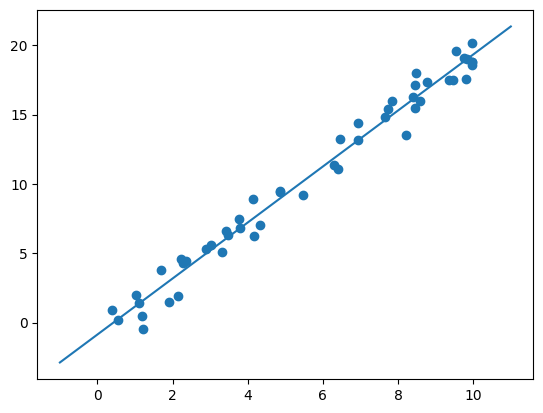

In [29]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

## **K-Nearest Neighbors**

**a. Introducing k-Nearest Neighbors (KNN) Algorithm:**

The k-nearest neighbors (KNN) algorithm is a simple and intuitive supervised learning algorithm used for classification tasks. It can also be used for regression tasks. KNN operates based on the principle that similar data points are likely to belong to the same class. In KNN, the "k" represents the number of nearest neighbors that are considered to determine the class of a new data point. The majority class among the k-nearest neighbors is assigned to the new data point as its predicted class.

**b. How the Algorithm Works and Basic Parameters:**

The steps to perform KNN are as follows:

1. Calculate the distance between the new data point and all the points in the training dataset using a distance metric like Euclidean distance.
2. Select the k-nearest data points (k neighbors) based on the smallest distances.
3. Determine the majority class among the k neighbors.
4. Assign the majority class as the predicted class for the new data point.

The most critical parameter in KNN is the "k" value. The value of k determines how many neighbors are considered for the prediction. Choosing a suitable k value is crucial, as a small k may lead to overfitting, and a large k may lead to underfitting.

**c. Implementation using scikit-learn:**

Scikit-learn provides a simple implementation of the KNN algorithm for classification tasks.

```python
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
X = np.array([[1, 2], [2, 3], [3, 4], [5, 1], [4, 2], [6, 3]])  # Features
y = np.array([0, 0, 0, 1, 1, 1])  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Predicted Labels:", y_pred)
print("Accuracy:", accuracy)
```

In this example, we create a KNN classifier with k=3 using scikit-learn, fit it with sample data, and make predictions on the test data. The accuracy of the model is calculated by comparing the predicted labels to the true labels. KNN is a simple yet effective algorithm for classification tasks and is especially useful when there is no clear decision boundary in the data. However, it may not perform well on high-dimensional data or large datasets due to its computational complexity.

### Classification

Let's take a look at another example of this process, using the Iris dataset we discussed last week.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

First load the dataset to dataframe. We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [30]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.


For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations

In [31]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [32]:
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)


We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [33]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [34]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [35]:
print(y_model)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa']


Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [ ]:
0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

## **Model Evaluation**

**a. Evaluation Metrics:**

Evaluation metrics are used to assess the performance of machine learning models. Different metrics are used depending on the nature of the problem, such as classification or regression. Here are some commonly used evaluation metrics for classification tasks:

1. **Accuracy:** Accuracy is the most straightforward metric and measures the percentage of correctly predicted instances out of all instances. It is suitable when the classes are balanced, meaning each class has a similar number of samples.

2. **Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions. It measures the model's ability to avoid false positives. High precision indicates fewer false positives.

3. **Recall (Sensitivity or True Positive Rate):** Recall is the ratio of true positive predictions to the total number of actual positive instances. It measures the model's ability to identify positive instances correctly. High recall indicates fewer false negatives.

4. **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an imbalance between classes.

5. **Specificity (True Negative Rate):** Specificity is the ratio of true negative predictions to the total number of actual negative instances. It measures the model's ability to identify negative instances correctly.

6. **ROC Curve (Receiver Operating Characteristic):** The ROC curve is a graphical representation of the trade-off between true positive rate (recall) and false positive rate as the classification threshold varies.

7. **AUC (Area Under the ROC Curve):** The AUC provides a single-value metric to summarize the ROC curve's performance. Higher AUC values indicate better model performance.

**b. Cross-Validation Techniques:**

Cross-validation is a resampling technique used to evaluate a model's performance by partitioning the data into multiple subsets. The model is trained on different subsets and tested on the remaining subset. This helps to get a more reliable estimate of the model's performance, especially when the dataset is limited.

Two common cross-validation techniques are:

1. **K-Fold Cross-Validation:** The data is divided into k subsets (folds) of approximately equal size. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold acting as the test set once. The final performance metric is the average of all k iterations.

2. **Stratified K-Fold Cross-Validation:** This is similar to k-fold cross-validation, but it ensures that each fold has a similar distribution of classes as the original dataset. It is especially useful when dealing with imbalanced datasets.

Here's an example of using k-fold cross-validation in scikit-learn:

```python
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Sample data and labels
X = np.array([[1, 2], [2, 3], [3, 4], [5, 1], [4, 2], [6, 3]])  # Features
y = np.array([0, 1, 0, 1, 0, 1])  # Labels

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Perform 5-fold cross-validation and calculate accuracy
cross_val_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", np.mean(cross_val_scores))
```

In this example, we use k-fold cross-validation to evaluate the performance of an SVM classifier on the sample data. The `cross_val_score` function from scikit-learn performs the cross-validation, and the `cv` parameter specifies the number of folds (in this case, 5). The `scoring` parameter is set to 'accuracy' to calculate accuracy as the evaluation metric. The function returns an array of accuracy scores for each fold, and the average accuracy is computed as the final performance metric.

## Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.
In the above case, half the dataset does not contribute to the training of the model!
This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use *cross-validation*; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.
Visually, it might look something like this:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-2-fold-CV.png?raw=1)

Here we do two validation trials, alternately using each half of the data as a holdout set.
Using the split data from before, we could implement it like this:

In [37]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

NameError: ignored

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance.
This particular form of cross-validation is a *two-fold cross-validation*—that is, one in which we have split the data into two sets and used each in turn as a validation set.

We could expand on this idea to use even more trials, and more folds in the data—for example, here is a visual depiction of five-fold cross-validation:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-5-fold-CV.png?raw=1)

Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.
This would be rather tedious to do by hand, and so we can use Scikit-Learn's ``cross_val_score`` convenience routine to do it succinctly:

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the ``cross_validation`` module.
For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial.
This type of cross-validation is known as *leave-one-out* cross validation, and can be used as follows:

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

Because we have 150 samples, the leave one out cross-validation yields scores for 150 trials, and the score indicates either successful (1.0) or unsuccessful (0.0) prediction.
Taking the mean of these gives an estimate of the error rate:

In [ ]:
scores.mean()

Other cross-validation schemes can be used similarly.
For a description of what is available in Scikit-Learn, use IPython to explore the ``sklearn.cross_validation`` submodule, or take a look at Scikit-Learn's online [cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

## **Practice Exercises**

**Exercise 1: Linear Regression**
Create a linear regression model to predict house prices based on the number of rooms (RM) in the Boston Housing dataset.

**Exercise 2: k-Nearest Neighbors (KNN)**
Use the Iris dataset and implement KNN to classify the species of iris flowers based on their sepal length and width.

**Exercise 3: Decision Trees**
Create a decision tree classifier to predict the survival of passengers on the Titanic dataset.

**Exercise 4: Logistic Regression**
Implement logistic regression on the Breast Cancer Wisconsin dataset to classify tumors as malignant or benign.

**Exercise 5: Support Vector Machines (SVM)**
Use the Iris dataset to implement an SVM classifier to classify iris flowers into different species.

**Exercise 6: Random Forest**
Create a random forest classifier to predict the type of wine in the Wine dataset.

**Exercise 7: Gradient Boosting**
Implement gradient boosting on the California housing dataset to predict the median house value.

**Exercise 8: Naive Bayes**
Use the Breast Cancer Wisconsin dataset to implement Naive Bayes for classifying tumors as malignant or benign.

**Exercise 9: Neural Networks**
Create a simple neural network using the digits dataset to classify handwritten digits.

**Exercise 10: Model Evaluation and Comparison**
Choose any two datasets from scikit-learn (e.g., breast cancer, iris, digits) and train multiple classifiers on each dataset. Compare their performance using evaluation metrics like accuracy, precision, recall, and F1-score.


## **Decision Trees**

**a. Explaining Decision Trees:**

Decision trees are versatile and widely used supervised learning algorithms that can be applied to both classification and regression tasks. They work by recursively partitioning the feature space into regions and assigning a class or a numeric value to each region. Each region corresponds to a leaf node, and the path from the root node to a leaf node represents a decision path.

In classification tasks, decision trees assign a class label to each leaf node based on the majority class of the training samples that fall into that region. In regression tasks, decision trees assign a numeric value to each leaf node, which is typically the average or median value of the target variable for the training samples in that region.

Decision trees are easy to interpret, and their visualization is similar to a flowchart, making them valuable for understanding the decision-making process in the data.

**b. Concepts of Nodes, Branches, and Entropy for Splitting:**

A decision tree consists of three main components:

1. Root Node: The topmost node in the tree, representing the entire dataset or feature space.

2. Internal Nodes: Nodes that represent splits in the data. Each internal node is associated with a feature and a splitting criterion.

3. Leaf Nodes: Nodes that represent the final outcome (class label or numeric value) of the decision process.

To determine how to split the data at each internal node, decision trees use measures like entropy, Gini impurity (for classification), or mean squared error (for regression). Entropy is a measure of the impurity or uncertainty of a set of samples. The goal is to minimize the impurity at each split, resulting in more homogeneous regions.

**c. Implementation using scikit-learn:**

Scikit-learn provides an easy-to-use implementation of decision trees for both classification and regression tasks.

**Classification:**

```python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Predicted Labels:", y_pred)
print("Accuracy:", accuracy)
```

**Regression:**

```python
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

print("Predicted Values:", y_pred)
print("Mean Squared Error:", mse)
```

In these examples, we use scikit-learn to implement decision trees for classification and regression tasks. We load the Iris and Boston datasets, split them into training and testing sets, create the decision tree models (classifier and regressor), fit them to the training data, make predictions on the test data, and evaluate their performance using accuracy (for classification) and mean squared error (for regression). Decision trees are powerful algorithms that are widely used in various machine learning tasks due to their simplicity, interpretability, and effectiveness.